# Experiment Notebook: Validator Revenue and Profit Yields

# Table of Contents
* [Experiment Summary](#Experiment-Summary)
* [Experiment Assumptions](#Experiment-Assumptions)
* [Experiment Setup](#Experiment-Setup)
* [Analysis 1: Revenue and Profit Yields Over Time](#Analysis-1:-Revenue-and-Profit-Yields-Over-Time)
* [Analysis 2: Revenue and Profit Yields Over ETH Staked](#Analysis-2:-Revenue-and-Profit-Yields-Over-ETH-Staked)
* [Analysis 3: Revenue and Profit Yields Over ETH Price](#Analysis-3:-Revenue-and-Profit-Yields-Over-ETH-Price)
* [Analysis 4: Profit Yields Over ETH Staked vs. ETH Price (Yield Surface)](#Analysis-4:-Profit-Yields-Over-ETH-Staked-vs.-ETH-Price)
* [Analysis 5: Profit Yields By Validator Environment Over Time](#Analysis-5:-Profit-Yields-By-Validator-Environment-Over-Time)

# Experiment Summary 

The purpose of this notebook is to explore the returns validators can expect from staking in the Ethereum protocol across different time horizons, adoption scenarios, ETH price scenarios and validator environments.

# Experiment Assumptions

See [assumptions document](ASSUMPTIONS.md) for further details.

# Experiment Setup

We begin with several experiment-notebook-level preparatory setup operations:

* Import relevant dependencies
* Enable enabling logging in order to... (TODO: complete and refine)
* Import relevant experiment templates
* Create copies of relevant experiment templates
* (TODO: refine and complete)


Analysis-specific setup operations are handled in their respective notebook sections.

In [1]:
# 3rd party Python dependencies
import copy
import logging
import numpy as np
import pandas as pd

# Local Python dependencies
import setup
import experiments.notebooks.visualizations as visualizations
import model.constants as constants
from experiments.run import run
from experiments.utils import inspect_module
from model.types import Stage
from model.system_parameters import validator_environments
from model.state_variables import eth_staked, eth_supply

time: 801 ms (started: 2021-07-01 21:01:10 +02:00)


In [2]:
# Enable/disable logging
logger = logging.getLogger()
logger.disabled = True

time: 22.3 ms (started: 2021-07-01 21:01:11 +02:00)


In [3]:
# Import the experiment templates
import experiments.templates.time_domain_analysis as time_domain_analysis
import experiments.templates.eth_staked_sweep_analysis as eth_staked_sweep_analysis
import experiments.templates.eth_price_sweep_analysis as eth_price_sweep_analysis
import experiments.templates.eth_price_eth_staked_grid_analysis as eth_price_eth_staked_grid_analysis

time: 679 ms (started: 2021-07-01 21:01:11 +02:00)


In [4]:
# Inspect an experiment template
inspect_module(eth_staked_sweep_analysis)

import numpy as np
import copy

from model.simulation_configuration import TIMESTEPS, DELTA_TIME
from model.state_variables import eth_staked, eth_supply
from experiments.default_experiment import experiment
from model.types import Stage


# Make a copy of the default experiment to avoid mutation
experiment = copy.deepcopy(experiment)

eth_staked_samples = np.linspace(
    eth_staked,
    eth_supply * 0.3,  # 30% of current total ETH supply
    50
)

parameter_overrides = {
    "stage": [Stage.BEACON_CHAIN],
    "eth_staked_process": [
        lambda run, _timestep: eth_staked_samples[run - 1],
    ],
    "eth_price_process": [
        # A sweep of two fixed ETH price points
        lambda _run, _timestep: 100,
        lambda _run, _timestep: 3000,
    ]
}

# Override default experiment parameters
experiment.simulations[0].model.params.update(parameter_overrides)
# Set runs to number of items in eth_staked_samples
experiment.simulations[0].runs = len(eth_staked_samples)
# Run single timestep, set unit of time to multiple epochs
experiment.simulations[0].timesteps = 1
experiment.simulations[0].model.params.update({"dt": [TIMESTEPS * DELTA_TIME]})

time: 100 ms (started: 2021-07-01 21:01:11 +02:00)


In [5]:
# Create copies of the experiment templates
simulation_1 = copy.deepcopy(time_domain_analysis.experiment.simulations[0])
simulation_2 = copy.deepcopy(eth_staked_sweep_analysis.experiment.simulations[0])
simulation_3 = copy.deepcopy(eth_price_sweep_analysis.experiment.simulations[0])
simulation_4 = copy.deepcopy(eth_price_eth_staked_grid_analysis.experiment.simulations[0])
simulation_5 = copy.deepcopy(time_domain_analysis.experiment.simulations[0])

time: 29.6 ms (started: 2021-07-01 21:01:11 +02:00)


Configure the experiments by overriding the default system parameters:

In [6]:
simulation_1.model.params.update({
    # TODO: should we simulate all stages?
    'stage': [Stage.BEACON_CHAIN],
    'validator_process': [
        lambda _run, _timestep: 3,  # Current average validators per epoch
        lambda _run, _timestep: 3 * 0.5,  # 50% lower scenario
        lambda _run, _timestep: 3 * 1.5,  # 50% higher scenario
    ]
})

time: 23.8 ms (started: 2021-07-01 21:01:11 +02:00)


In [7]:
simulation_2.model.params.update({})

time: 23.1 ms (started: 2021-07-01 21:01:11 +02:00)


In [8]:
simulation_3.model.params.update({
    'eth_staked_process': [
        lambda _run, _timestep: eth_staked,
        lambda _run, _timestep: min(eth_staked * 2, eth_supply * 0.3),
    ]
})

time: 23.9 ms (started: 2021-07-01 21:01:12 +02:00)


In [9]:
simulation_5.model.params.update({'stage': [Stage.BEACON_CHAIN]})

time: 24.8 ms (started: 2021-07-01 21:01:12 +02:00)


# Analysis 1: Revenue and Profit Yields Over Time

This analysis allows the exploration of revenue and profit yields over time, and across three adoption scenarios:

* Normal adoption: assumes (TODO: ADD Assumption)
* Low adoption: assumes (TODO: ADD Assumption)
* High adoption: assumes (TODO: ADD Assumption)

The first chart ("Validator adoption scenarios") visualizes the three adoption scenarios (i.e. implied ETH staked over time) underlying Analysis 1. Please note that the Bull Case scenario has non-linear dynamics due to activation queue rate limiations. To create custom adoption scenarios, (TODO: ADD one sentence how to go about changing these scenarios concretely).

The second chart ("Revenue and Profit Yields Over Time - At a Glance") visualizes both revenue and profit yields over time and across the three adoption scenarios (i.e. implied ETH staked over time). ETH Price (relevant for profit yields) can be changed via a slider (TODO: slider for price would be awesome; possible within and hour max to do? Backup option would be to just take something around 1500 maybe?). The higher the adoption, the lower both revenue and profit yields. The higher the price, the higher profit yields.

The third chart ("Revenue or Profit Yields Over Time") visualizes revenue yields or profit yields (choose via drop-down) over the chosen time frame, and across the three adoption scenarios  (i.e. implied ETH staked over time) and ETH price range. In simple terms, this chart visualizes how validators can expect to the yield dynamics to change over different adoption and price scenarios. The higher the adoption, the lower both revenue and profit yields. The higher the price, the higher profit yields.

The fourth chart ("Cumulative Average Revenue or Profit Yields Over Time") (TODO: Magician chart, to be added) visualizes the cumulative average revenue yields or profit yields (choose via drop-down) over the chosen time frame, and across the three adoption scenarios (i.e. implied ETH staked over time) and ETH price range. In simple terms, this chart visualizes the effective yields a validator can expect over the respective time horizons if he starts validating today. The higher the adoption, the lower both revenue and profit yields. The higher the price, the higher profit yields.









In [10]:
df_1, _exceptions = run(simulation_1)

2021-07-01 21:01:13,977 - numexpr.utils - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-07-01 21:01:13,978 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.
time: 5.05 s (started: 2021-07-01 21:01:12 +02:00)


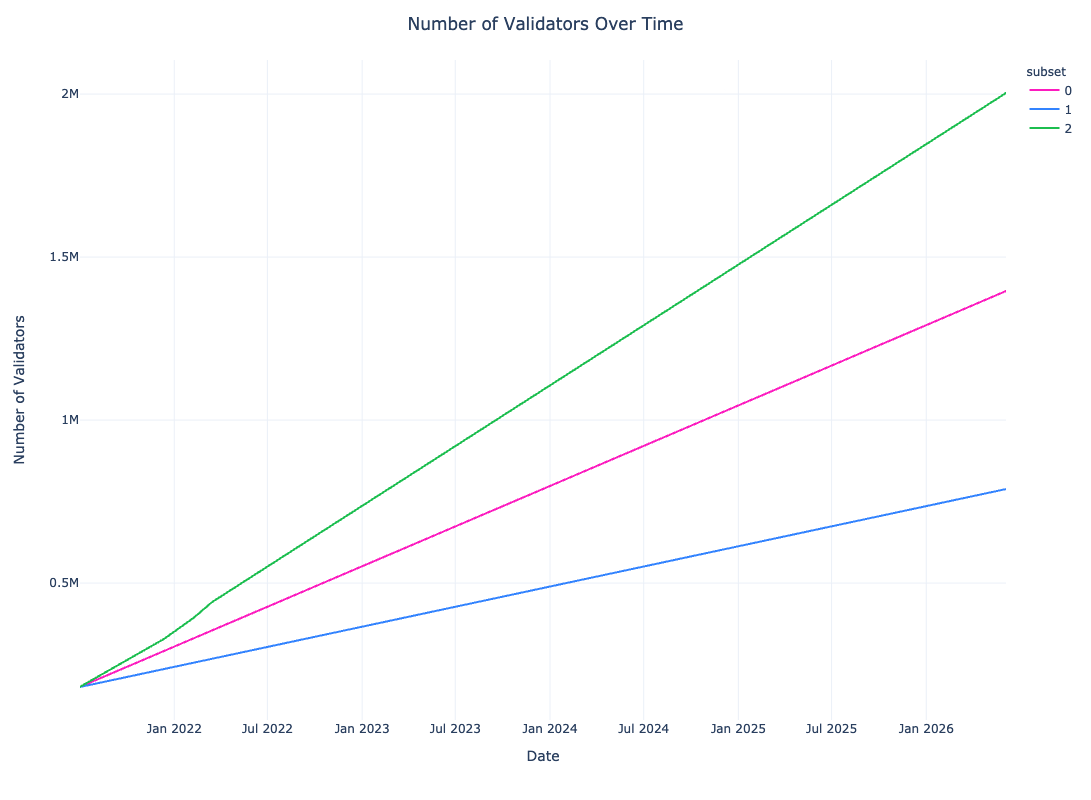

time: 473 ms (started: 2021-07-01 21:01:17 +02:00)


In [11]:
# TODO: update legend to show scenario names (Bull Case, Base Case, Bear Case)
# TODO: Chart title: "Validator Adoption Scenarios"
# TODO: Add time slider

visualizations.plot_number_of_validators_over_time_foreach_subset(df_1)

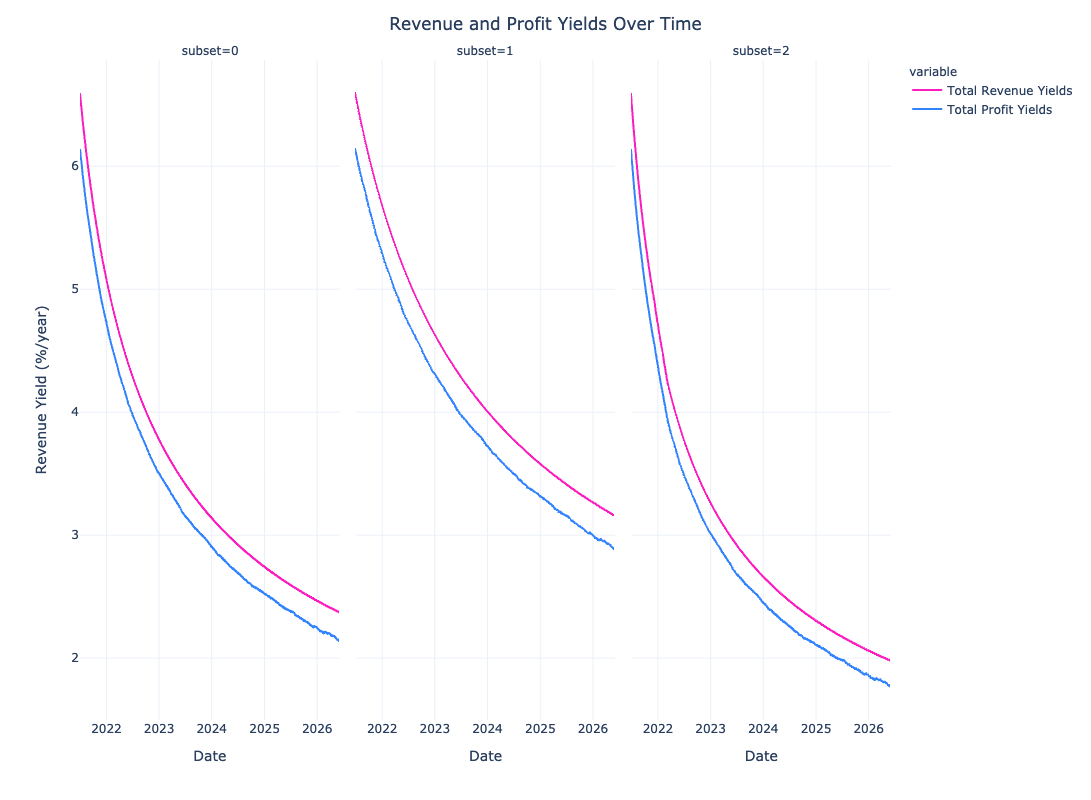

time: 459 ms (started: 2021-07-01 21:01:17 +02:00)


In [12]:
# TODO: update legend to show scenario names (Bull Case, Base Case, Bear Case)
# TODO: Chart title: "Revenue and Profit Yields Over Time - At a Glance"
# TODO: Add time slider

# The chart below visualizes revenue and profit yields over time and across the three adoption scenarios shown above (i.e. implied ETH staked over time). The higher the adoption, the lower both revenue and profit yields.



visualizations.plot_revenue_profit_yields_over_time_foreach_subset(df_1)

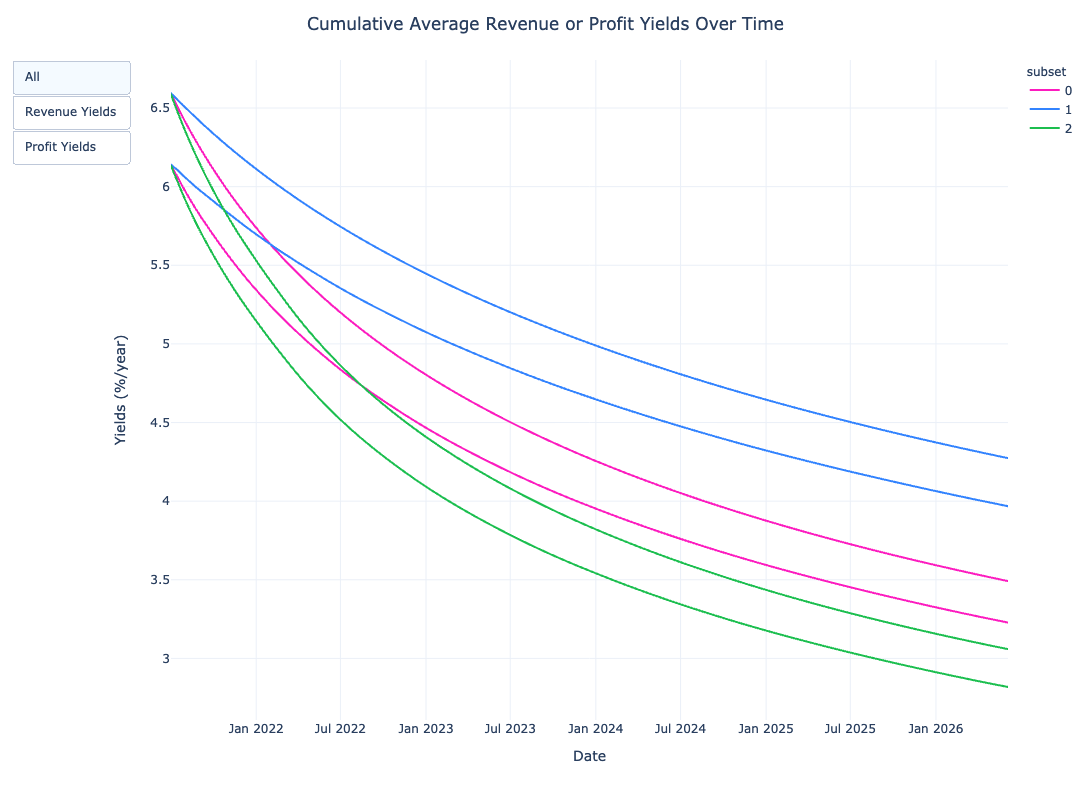

time: 542 ms (started: 2021-07-01 21:15:27 +02:00)


In [28]:
# TODO: WIP code to be moved into 'visualizations' module once ready

import plotly.express as px

# Expanding mean revenue yields
df_1['avg_revenue_yields_pct'] = df_1.query('subset == 0')['total_revenue_yields_pct'].expanding().mean()
df_1['avg_revenue_yields_pct'] = df_1['avg_revenue_yields_pct'].fillna(df_1.query('subset == 1')['total_revenue_yields_pct'].expanding().mean())
df_1['avg_revenue_yields_pct'] = df_1['avg_revenue_yields_pct'].fillna(df_1.query('subset == 2')['total_revenue_yields_pct'].expanding().mean())

# Expanding mean profit yields
df_1['avg_profit_yields_pct'] = df_1.query('subset == 0')['total_profit_yields_pct'].expanding().mean()
df_1['avg_profit_yields_pct'] = df_1['avg_profit_yields_pct'].fillna(df_1.query('subset == 1')['total_profit_yields_pct'].expanding().mean())
df_1['avg_profit_yields_pct'] = df_1['avg_profit_yields_pct'].fillna(df_1.query('subset == 2')['total_profit_yields_pct'].expanding().mean())

fig = px.line(df_1, x="timestamp", y=["avg_revenue_yields_pct", "avg_profit_yields_pct"],  color='subset')

fig.update_layout(
    title="Cumulative Average Revenue or Profit Yields Over Time",
    xaxis_title="Date",
    yaxis_title="Yields (%/year)",
    yaxis=dict(
        tickmode='linear',
        dtick=0.5
    )
)

fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        buttons=[
            dict(
                label = 'All',
                method = 'update',
                args = [{'visible': [True, True]}, {'showlegend':True}]
            ),
            dict(
                label = 'Revenue Yields',
                method = 'update',
                args = [{'visible': [True, 'legendonly']}, {'showlegend':True}]
            ),
            dict(
                label = 'Profit Yields',
                method = 'update',
                args = [{'visible': ['legendonly', True]}, {'showlegend':True}]
            )
        ]
    )]
)


fig.show()

# Analysis 2: Revenue and Profit Yields Over ETH Staked

This analysis allows the exploration of revenue and profit yields over a large range of ETH staked. Compared to Analysis 1 (which assumed ETH staked ranges as part of the adoption scenarios), Analysis 2 explicit shows the yields validators can expect at certain points in the validator adoption curve. Profit yields are sensitive to ETH price (USD/ETH) and plotted at 100 USD/ETH and 3000 USD/ETH. 


In [14]:
df_2, _exceptions = run(simulation_2)

time: 338 ms (started: 2021-07-01 21:01:18 +02:00)


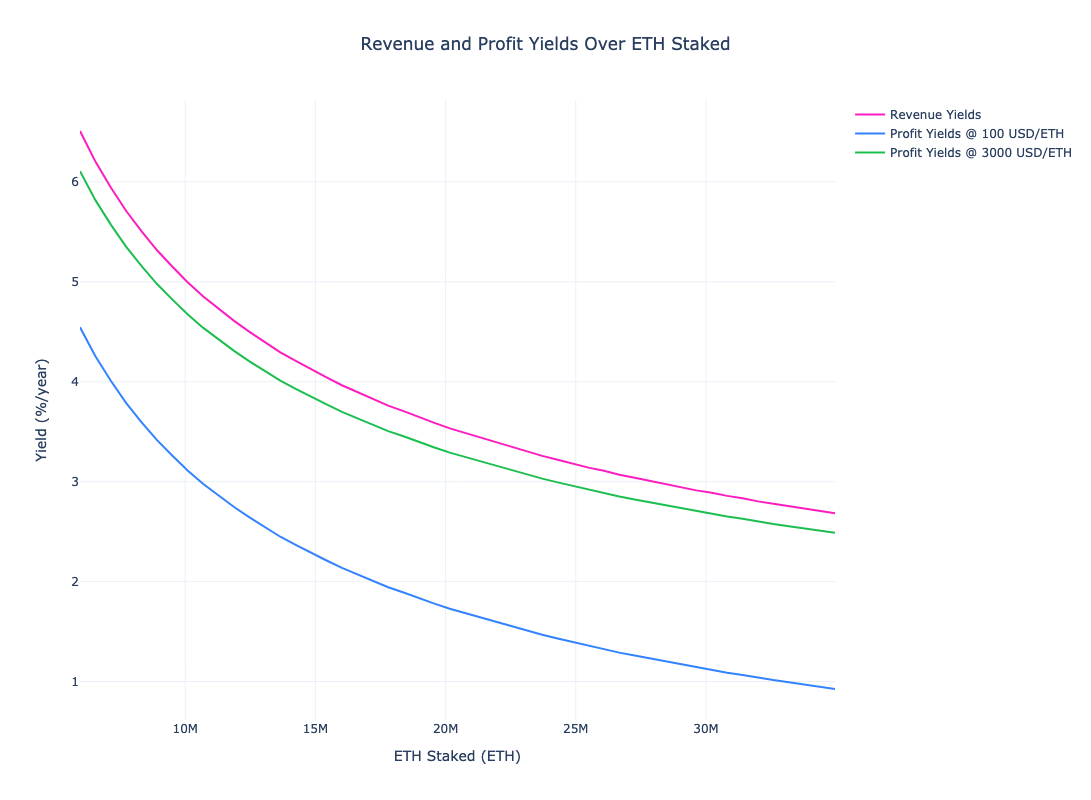

time: 56.9 ms (started: 2021-07-01 21:01:18 +02:00)


In [15]:
visualizations.plot_revenue_profit_yields_over_eth_staked(df_2)

# Analysis 3: Revenue and Profit Yields Over ETH Price

This analysis allows the exploration of revenue and profit yields over a large range of ETH prices (USD/ETH)Revenue yields are not sensitive to ETH price, hence the horizontal line. Profit yields drop quickly at very low ETH prices and stabilize at higher ETH prices.

In [16]:
df_3, _exceptions = run(simulation_3)

time: 322 ms (started: 2021-07-01 21:01:18 +02:00)


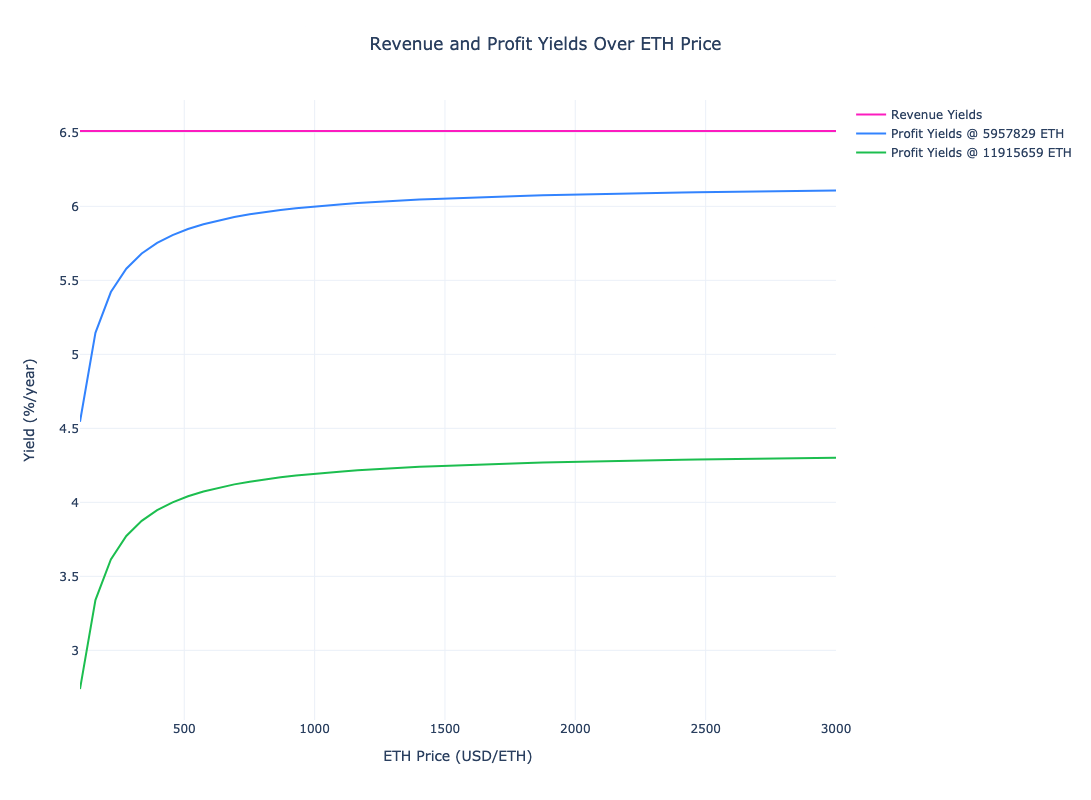

time: 45 ms (started: 2021-07-01 21:01:19 +02:00)


In [17]:
# TODO: Select only one illustrative, somewhat medium size adoption level and have only two lines, one for rev and one for profit; would kill the green line; change legend to say "@xyz ETH Staked" for either of the two remaining data series; put legend below chart if it gets too long, so it does not push chart to become very small

visualizations.plot_revenue_profit_yields_over_eth_price(df_3)

# Analysis 4: Profit Yields Over ETH Staked vs. ETH Price

This (TODO: ADD NAME OF CHART TYPE) was made to created to enable at-a-glance intuition about the relationship between profit yields, validator adoption, and ETH price (and because we like colorful charts). Profit yields are highest when ETH price is high, and when adoption is low. 

In [19]:
df_4, _exceptions = run(simulation_4)

time: 832 ms (started: 2021-07-01 21:02:30 +02:00)


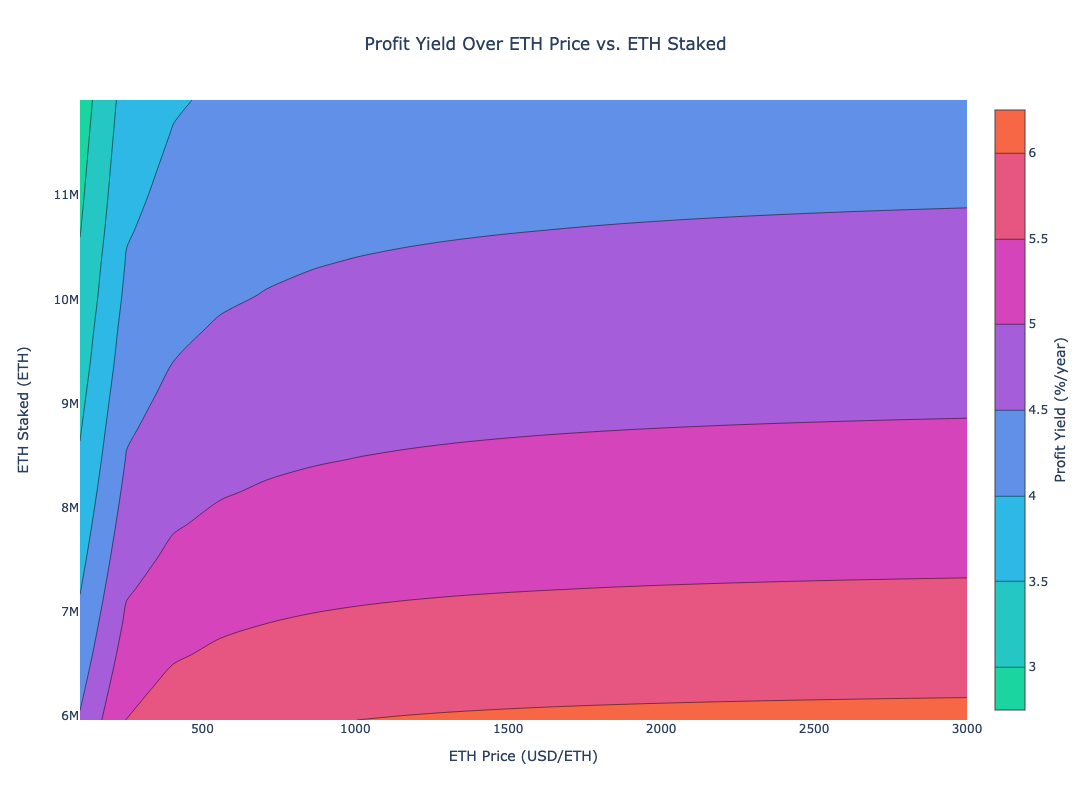

time: 150 ms (started: 2021-07-01 21:02:31 +02:00)


In [20]:
visualizations.plot_validator_environment_yield_contour(df_4)

This (TODO: ADD NAME OF CHART TYPE) plots the same data as the charts above and is arguably less readable. But since some folks might appreciate the fanciness of a 3D plot, we decided to not kill it 

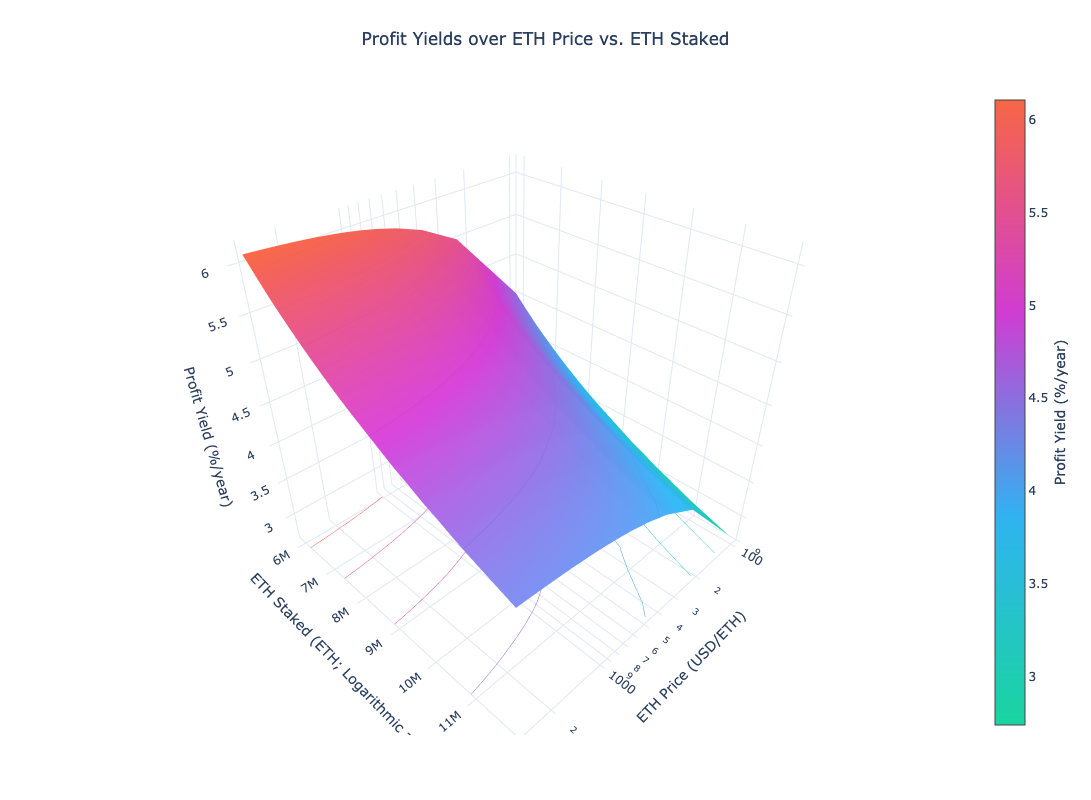

time: 168 ms (started: 2021-07-01 21:02:34 +02:00)


In [21]:
visualizations.plot_validator_environment_yield_surface(df_4)

# Analysis 5: Profit Yields By Validator Environment Over Time

This analysis allows the exploration of revenue and profit yields per validator environment over time. The analysis is based on the "Normal Adoption" scenario descriped in Analysis 1 (TODO: confirm if that is the case). This analysis naturally heavily dpends on the cost assumptions per validator environment, and we encourage the user to review the [assumptions document](ASSUMPTIONS.md) in this context. 

Please note the "custom" validator environment is currently set to the network average (average across all validator environments) (TODO: CONFIRM), but can be customized to represent customized cost structures (TODO: say how or where to find info about that)



In [22]:
df_5, _exceptions = run(simulation_5)

time: 1.7 s (started: 2021-07-01 21:02:41 +02:00)


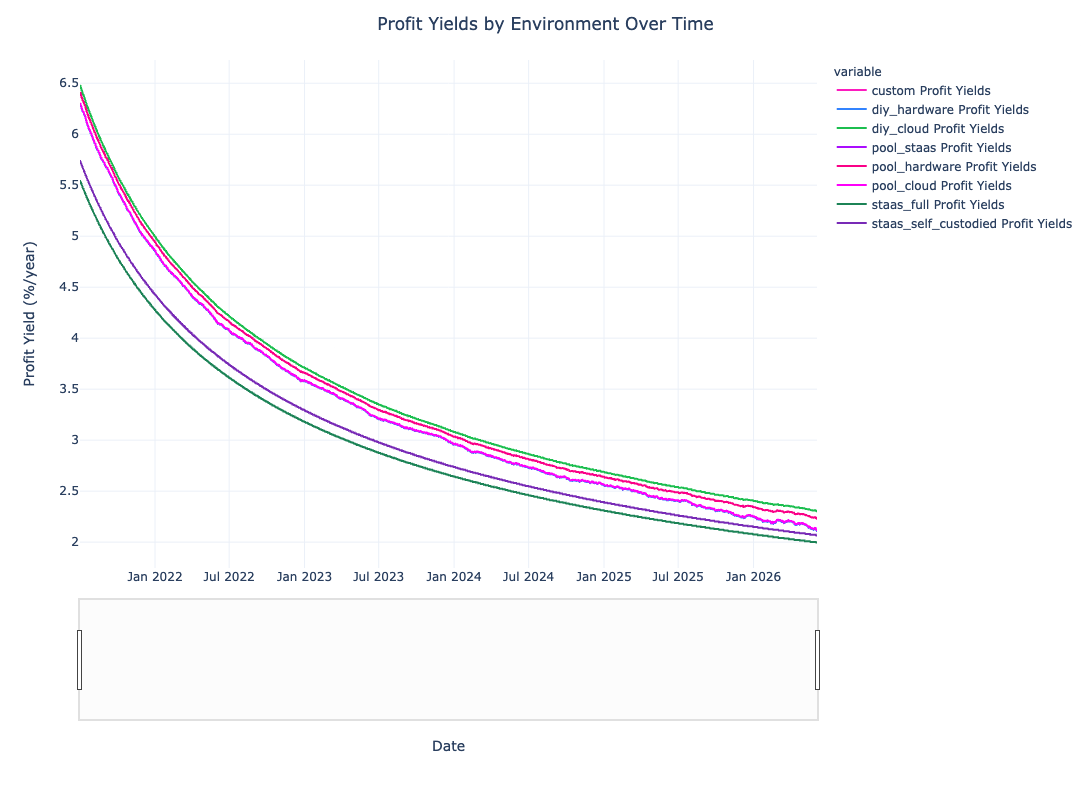

time: 565 ms (started: 2021-07-01 21:02:43 +02:00)


In [23]:
# TODO: remove "variable" from legend
# TODO: remove "variable" from legend
visualizations.plot_profit_yields_by_environment_over_time(df_5)